In [33]:
import re
import nltk
import random
import string
import os
import pandas as pd
from wordcloud import WordCloud
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import TSNEVisualizer

In [4]:
nltk.download('stopwords')
%pip install WordCloud
%pip install yellowbrick

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asdcx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
def process_book(book_path, num_sentences=200, sentence_len=100):
    # Read the text book
    with open(book_path, 'r', encoding='utf-8') as f:
        book = f.read()


    # remove all the empty lines
    book = re.sub(r'\n\s*\n', '\n', book)


    # tokenize the book
    tokens = nltk.word_tokenize(book)


    # lower case all the words
    tokens = [w.lower() for w in tokens]


    # remove stopwords from tokens
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [w for w in tokens if w not in stop_words]


    # remove punctuation from tokens
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]


    # remove remaining tokens that are not alphabetic
    tokens = [w for w in tokens if w.isalpha()]


    # get the author name
    author = re.search(r'Author: (.*)', book).group(1)


    # create random sentences from the tokens
    sentences = []
    for i in range(num_sentences):
        index = random.randint(0, len(tokens)-sentence_len)
        sentence = " ".join(tokens[index:index+sentence_len])
        sentences.append(sentence)


    # create a dataframe from the sentences associated with the author name as a label 
    df = pd.DataFrame({'sentence': sentences, 'author': author})


    return df

In [18]:
# define the folder path containing the books
folder_path ='F:/الكلية/DEBI/uottawa/NLP/assignment/assignment 3/Book-Classifaction/BOOKS'

# create an empty dataframe to store the processed books
df_books = pd.DataFrame(columns=['sentence', 'author'])

# loop through all the files in the folder
for filename in os.listdir(folder_path):
    # check if the file is a text file
    print(filename)
    if filename.endswith('.txt'):
        # get the full path of the file
        file_path = os.path.join(folder_path, filename)
        # process the book and append the resulting dataframe to the main dataframe
        df_book = process_book(file_path)
        df_books = pd.concat([df_books, df_book], ignore_index=True)

# print the first few rows of the resulting dataframe



A fighting man of Mars.txt
A Journey to the Centre of the Earth.txt
The Eyes Have It.txt
The Lost World.txt
The War of the Worlds.txt


In [19]:
Author = list(df_books.author.unique())
Author_dic={}
for index ,name  in enumerate(Author):
    Author_dic[index] =name
Author_dic

{0: 'Edgar Rice Burroughs',
 1: 'Jules Verne',
 2: 'Philip Kindred Dick',
 3: 'Arthur Conan Doyle',
 4: 'H. G. Wells'}

In [31]:
#################################################
##function to display all frequency
###########################################


def show_most_word_in_book(df_books,number_of_book=0,number_of_ma_word=200,list_names=Author_dic):
    all_words = WordCloud(collocations=False,
                background_color="white",
                max_words=number_of_ma_word,
                contour_color='steelblue',
                contour_width=16)

    # Generate a wordcloud
    print("Name of Author ",Author_dic.get(number_of_book))
    print(df_books[df_books["author"]==number_of_book]["sentence"])
    all_words.generate(str(df_books[df_books['author']==number_of_book]['sentence']))

    # show
    plt.figure(figsize=[40,20])
    plt.imshow(all_words)
    plt.legend(Author_dic.get(number_of_book))

    plt.show()

In [20]:
df_books['author'] = pd.factorize(df_books['author'])[0]

<AxesSubplot:ylabel='count'>

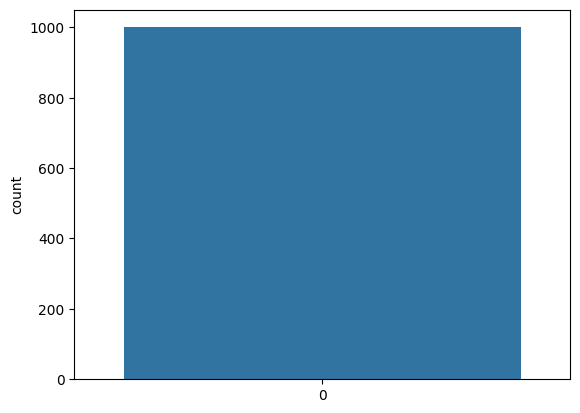

In [21]:

sns.countplot(df_books['author'])

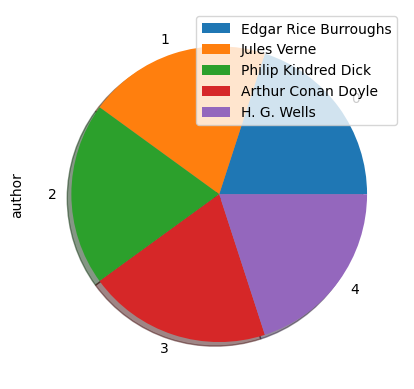

In [22]:
df_books['author'].value_counts().plot.pie( shadow = True)
plt.legend([Author_dic.get(0),Author_dic.get(1),Author_dic.get(2),Author_dic.get(3),Author_dic.get(4)])
plt.show()


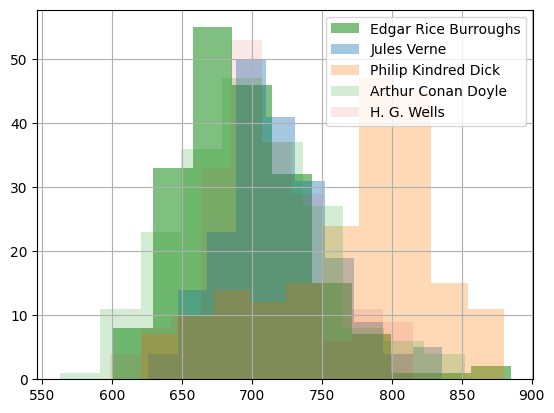

In [23]:
df_books['char_length']=df_books['sentence'].apply(len)
df_books[df_books['author']==0]['char_length'].hist(label=df_books['author'],alpha=0.5,color=['green'] )
df_books[df_books['author']==1]['char_length'].hist(label=df_books['author'],alpha=0.4)
df_books[df_books['author']==2]['char_length'].hist(label=df_books['author'],alpha=0.3)
df_books[df_books['author']==3]['char_length'].hist(label=df_books['author'],alpha=0.2)
df_books[df_books['author']==4]['char_length'].hist(label=df_books['author'],alpha=0.1)
plt.legend([Author_dic.get(0),Author_dic.get(1),Author_dic.get(2),Author_dic.get(3),Author_dic.get(4)])


Name of Author  Edgar Rice Burroughs
0      added still live presently feeling rested set ...
1      certain inflict acute torture upon would give ...
2      mind would take chances fortunately escaped mo...
3      tul axtar deceived grumbling opened one keel h...
4      rich design perfect carving master craftsman p...
                             ...                        
195    held cloak invisibility like canopy shield gir...
196    bodies repulsive eye red man great shock white...
197    fawning reverence anything pertaining royalty ...
198    coming interior tower beneath stepping open tr...
199    host also commanding officer never noticed eve...
Name: sentence, Length: 200, dtype: object


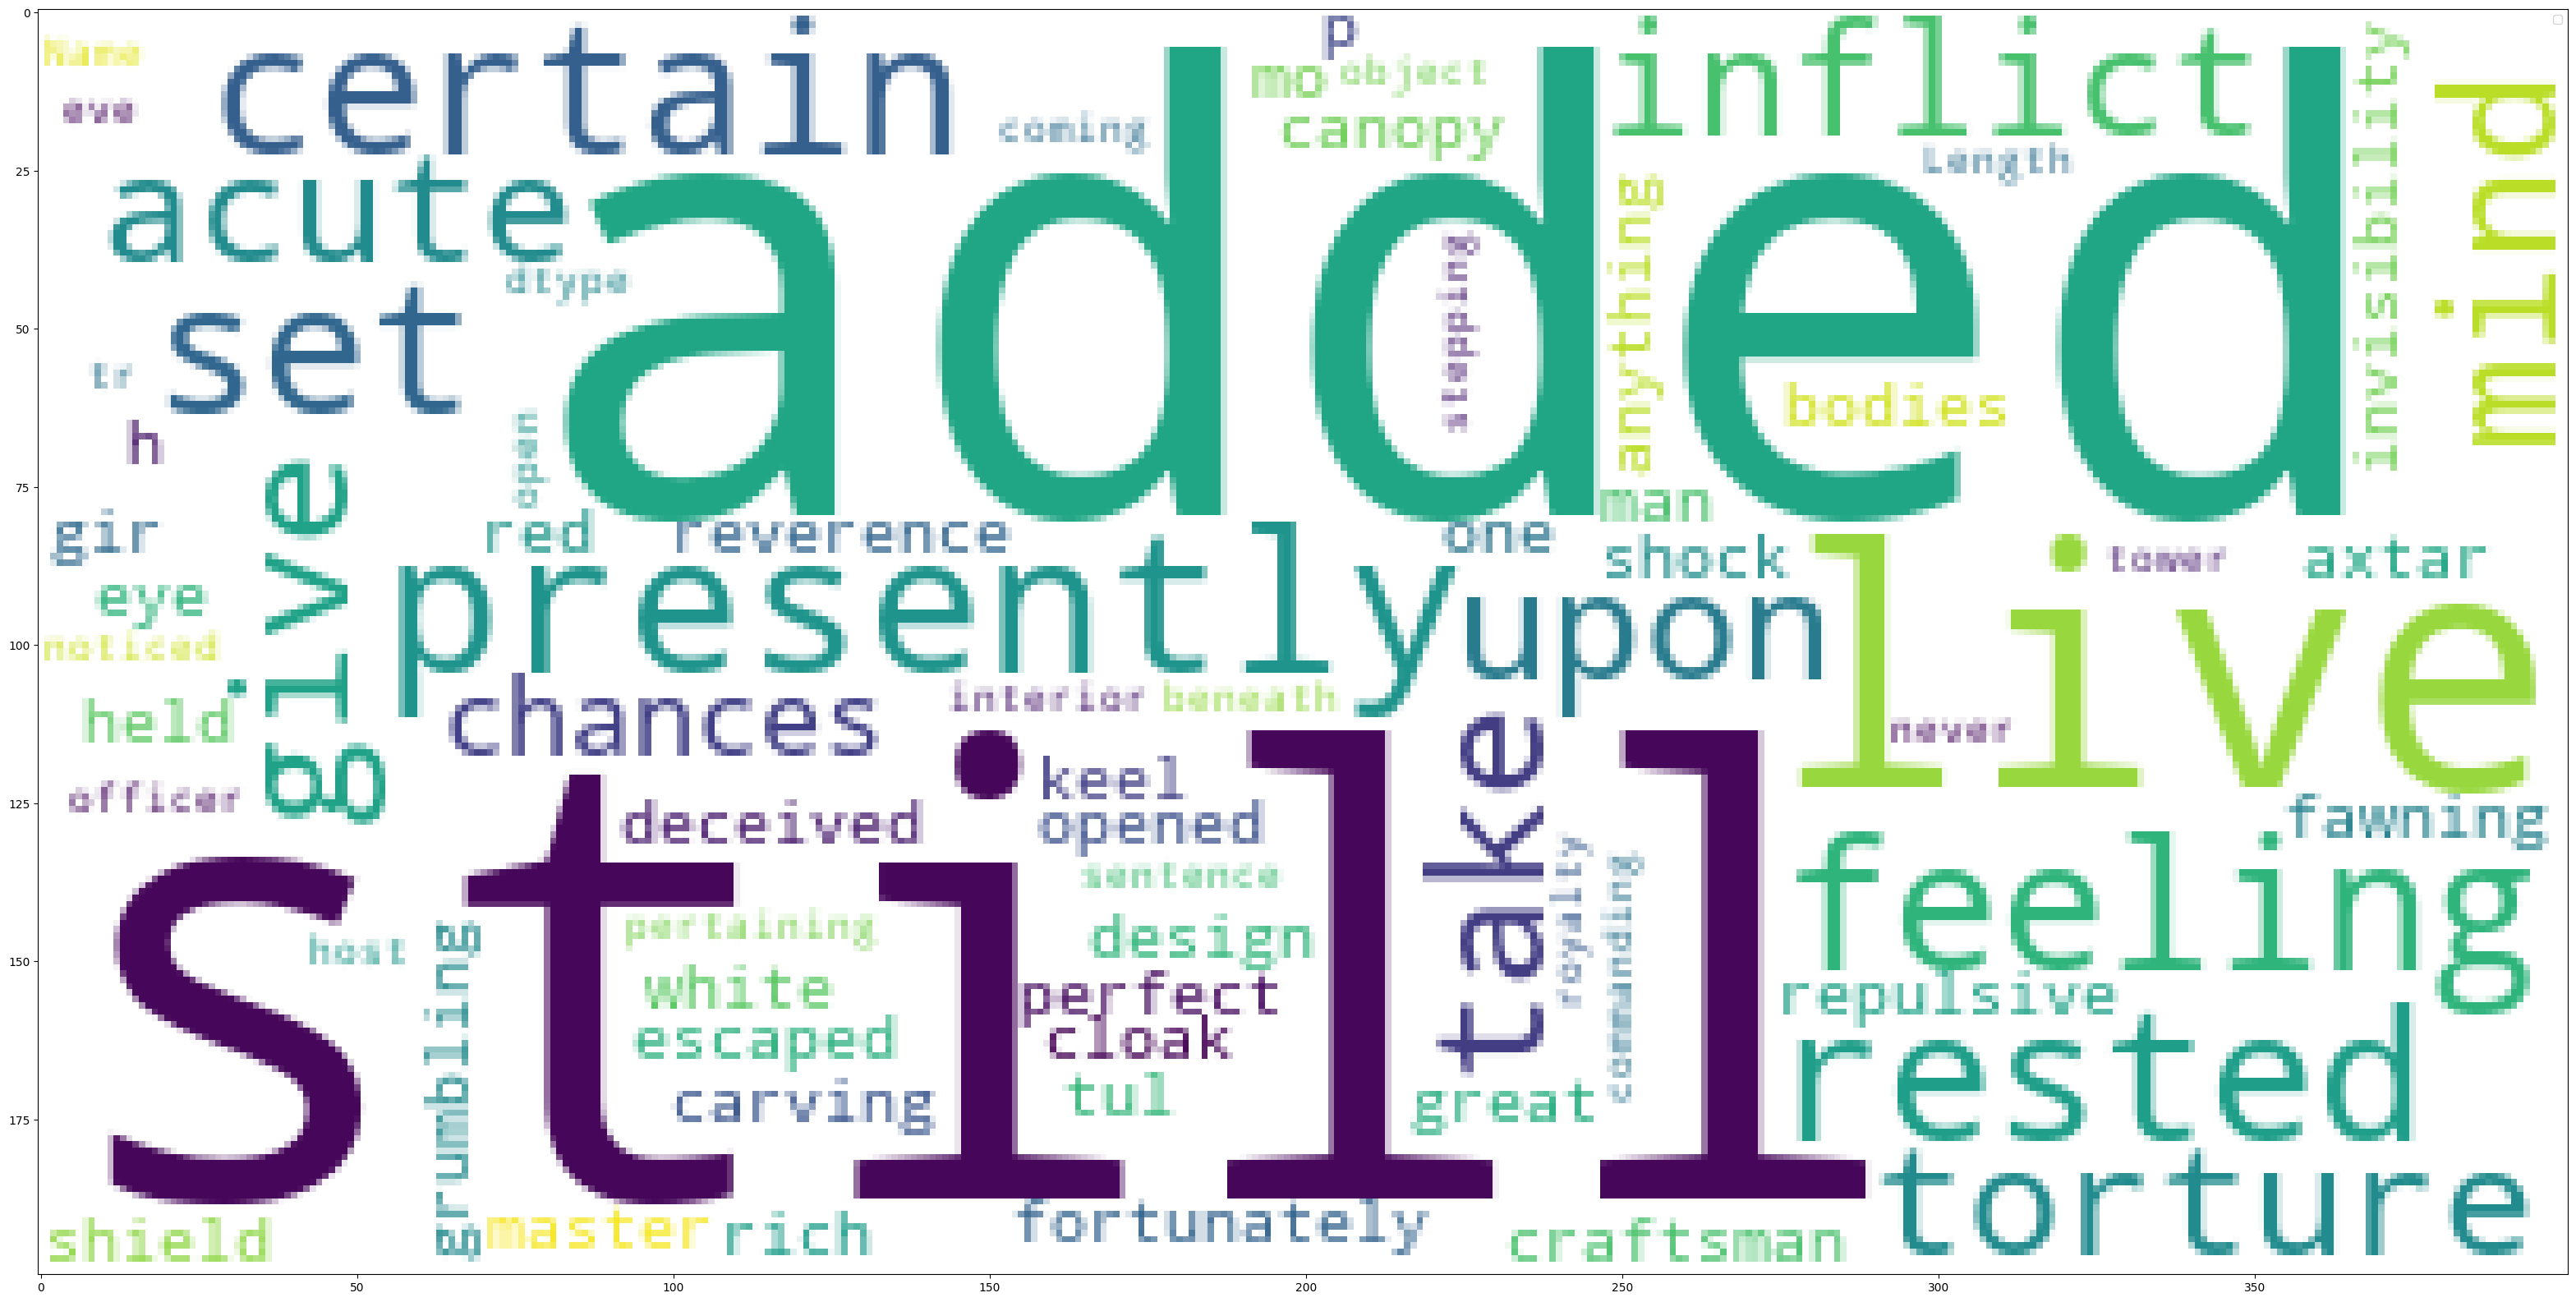

Name of Author  Jules Verne
200    explanations adjourn period arrival time meanw...
201    rocks fire boiling water word filled every kin...
202    rendered uneasy uncomfortable really existence...
203    strong rope may conceive whole made tolerable ...
204    yes wholly stark staring mad needle jumped pol...
                             ...                        
395    fact person thoroughly understand whole period...
396    even two leagues towards centre earth descents...
397    iceland whole century mighty turf pit measured...
398    upward towards strange mysterious sky one bird...
399    cases certain wood rising early morn taking ch...
Name: sentence, Length: 200, dtype: object


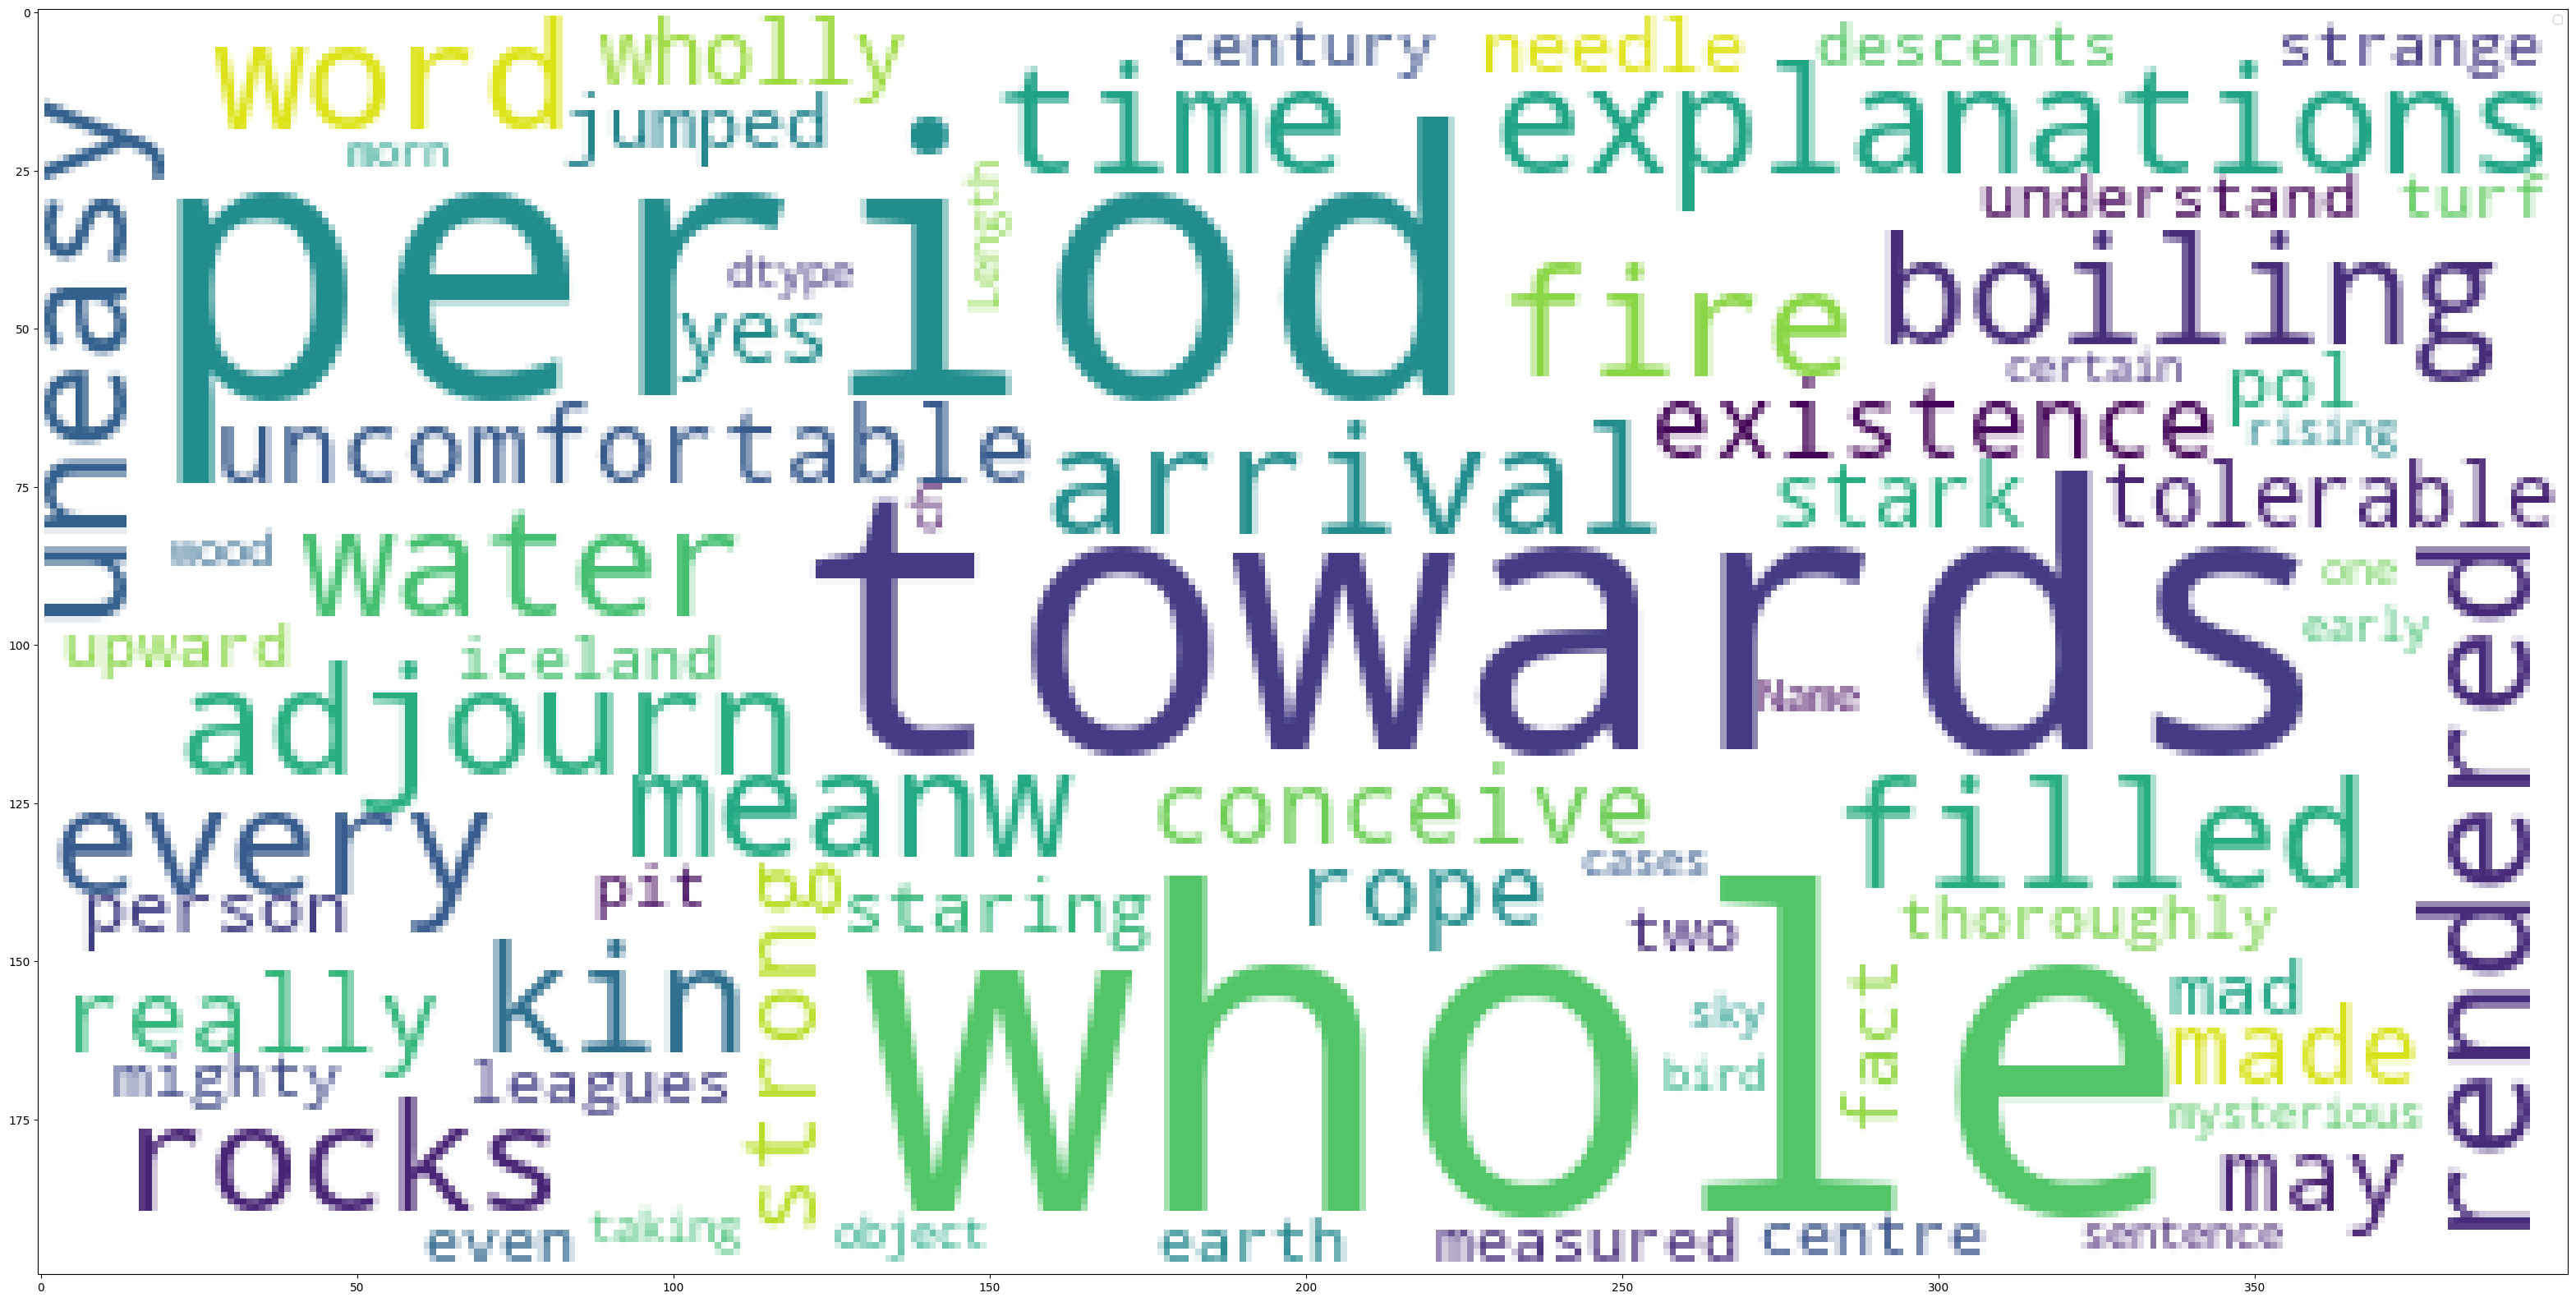

Name of Author  Philip Kindred Dick
400    compliance requirements uniform takes consider...
401    language english start project gutenberg ebook...
402    find type humor anywhere topflight sciencefict...
403    later matter amplified eyes moved person perso...
404    outside united states us laws alone swamp smal...
                             ...                        
595    codes damage read equipment limited warranty d...
596    assistance need critical reaching project gute...
597    disclaimer limitation permitted applicable sta...
598    paragraphs individual project gutenbergtm elec...
599    trademark may used associated way electronic w...
Name: sentence, Length: 200, dtype: object


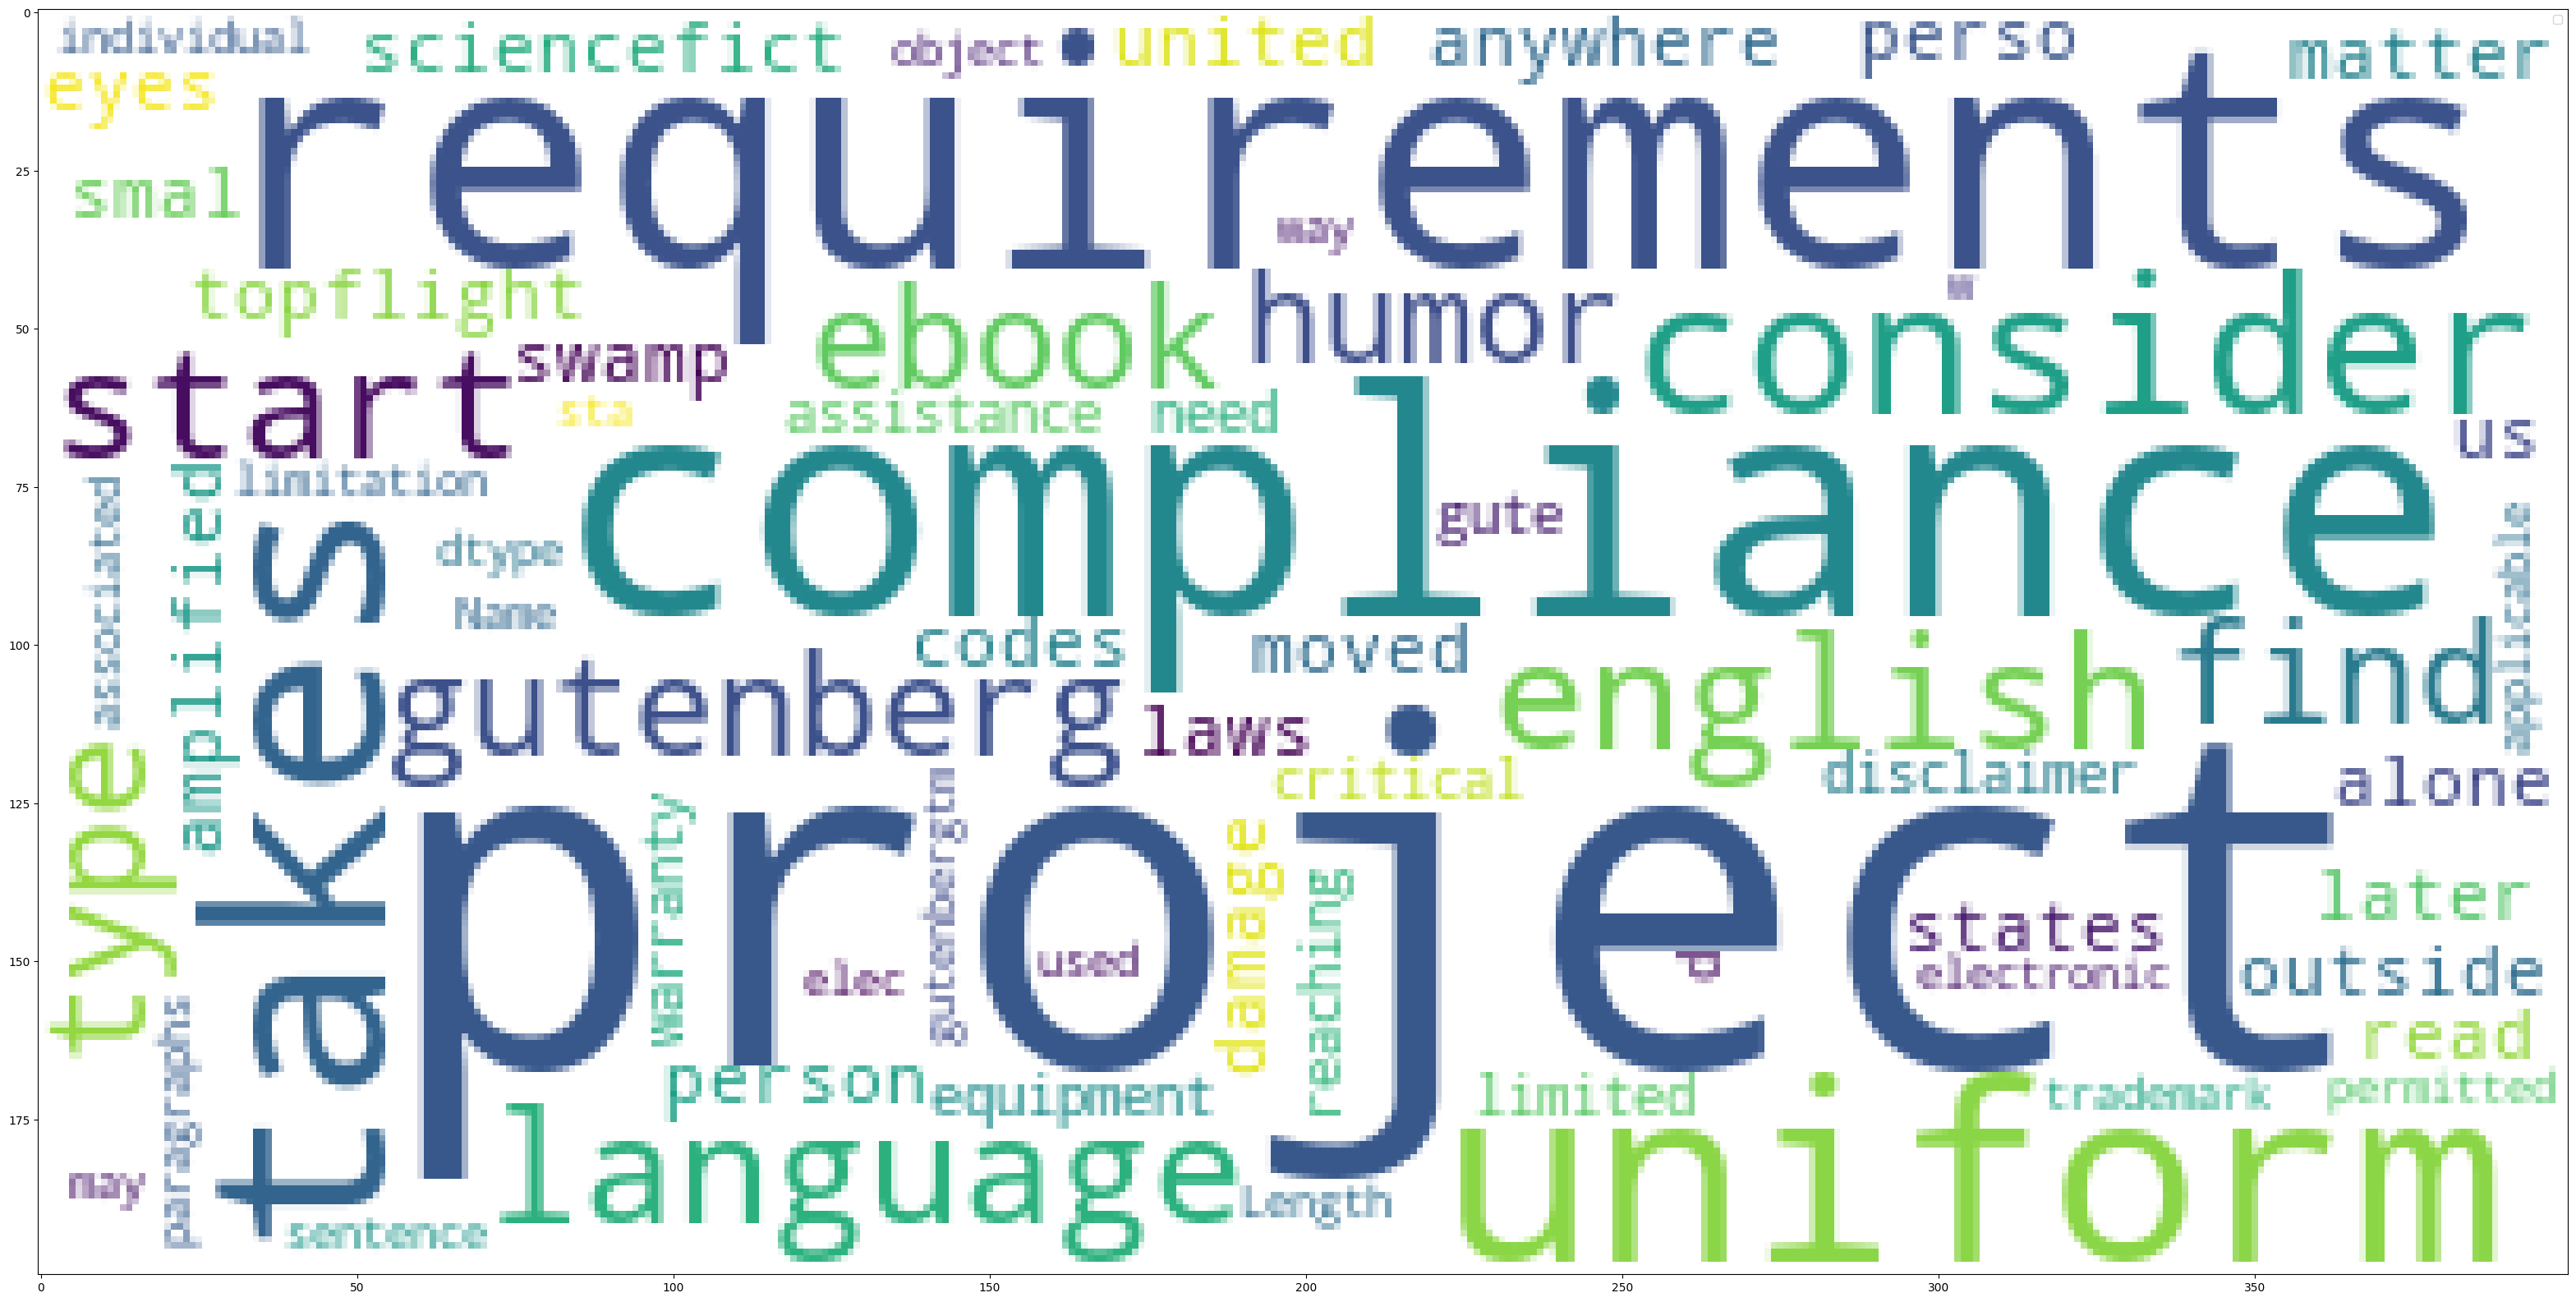

Name of Author  Arthur Conan Doyle
600    frequent repetition word doda made clear enoug...
601    place sure faithful zambo presently get letter...
602    center hollow high could reach top hand appear...
603    alive plenty good lush greenstuff keep going c...
604    check statement one may check disguise difficu...
                             ...                        
795    battle last word gunsmith s art st james stree...
796    could conceived first principles zoology littl...
797    actual guide country professor challenger s re...
798    experiences absolutely date indian could bear ...
799    let liked drew line pretty sharply us mighty c...
Name: sentence, Length: 200, dtype: object


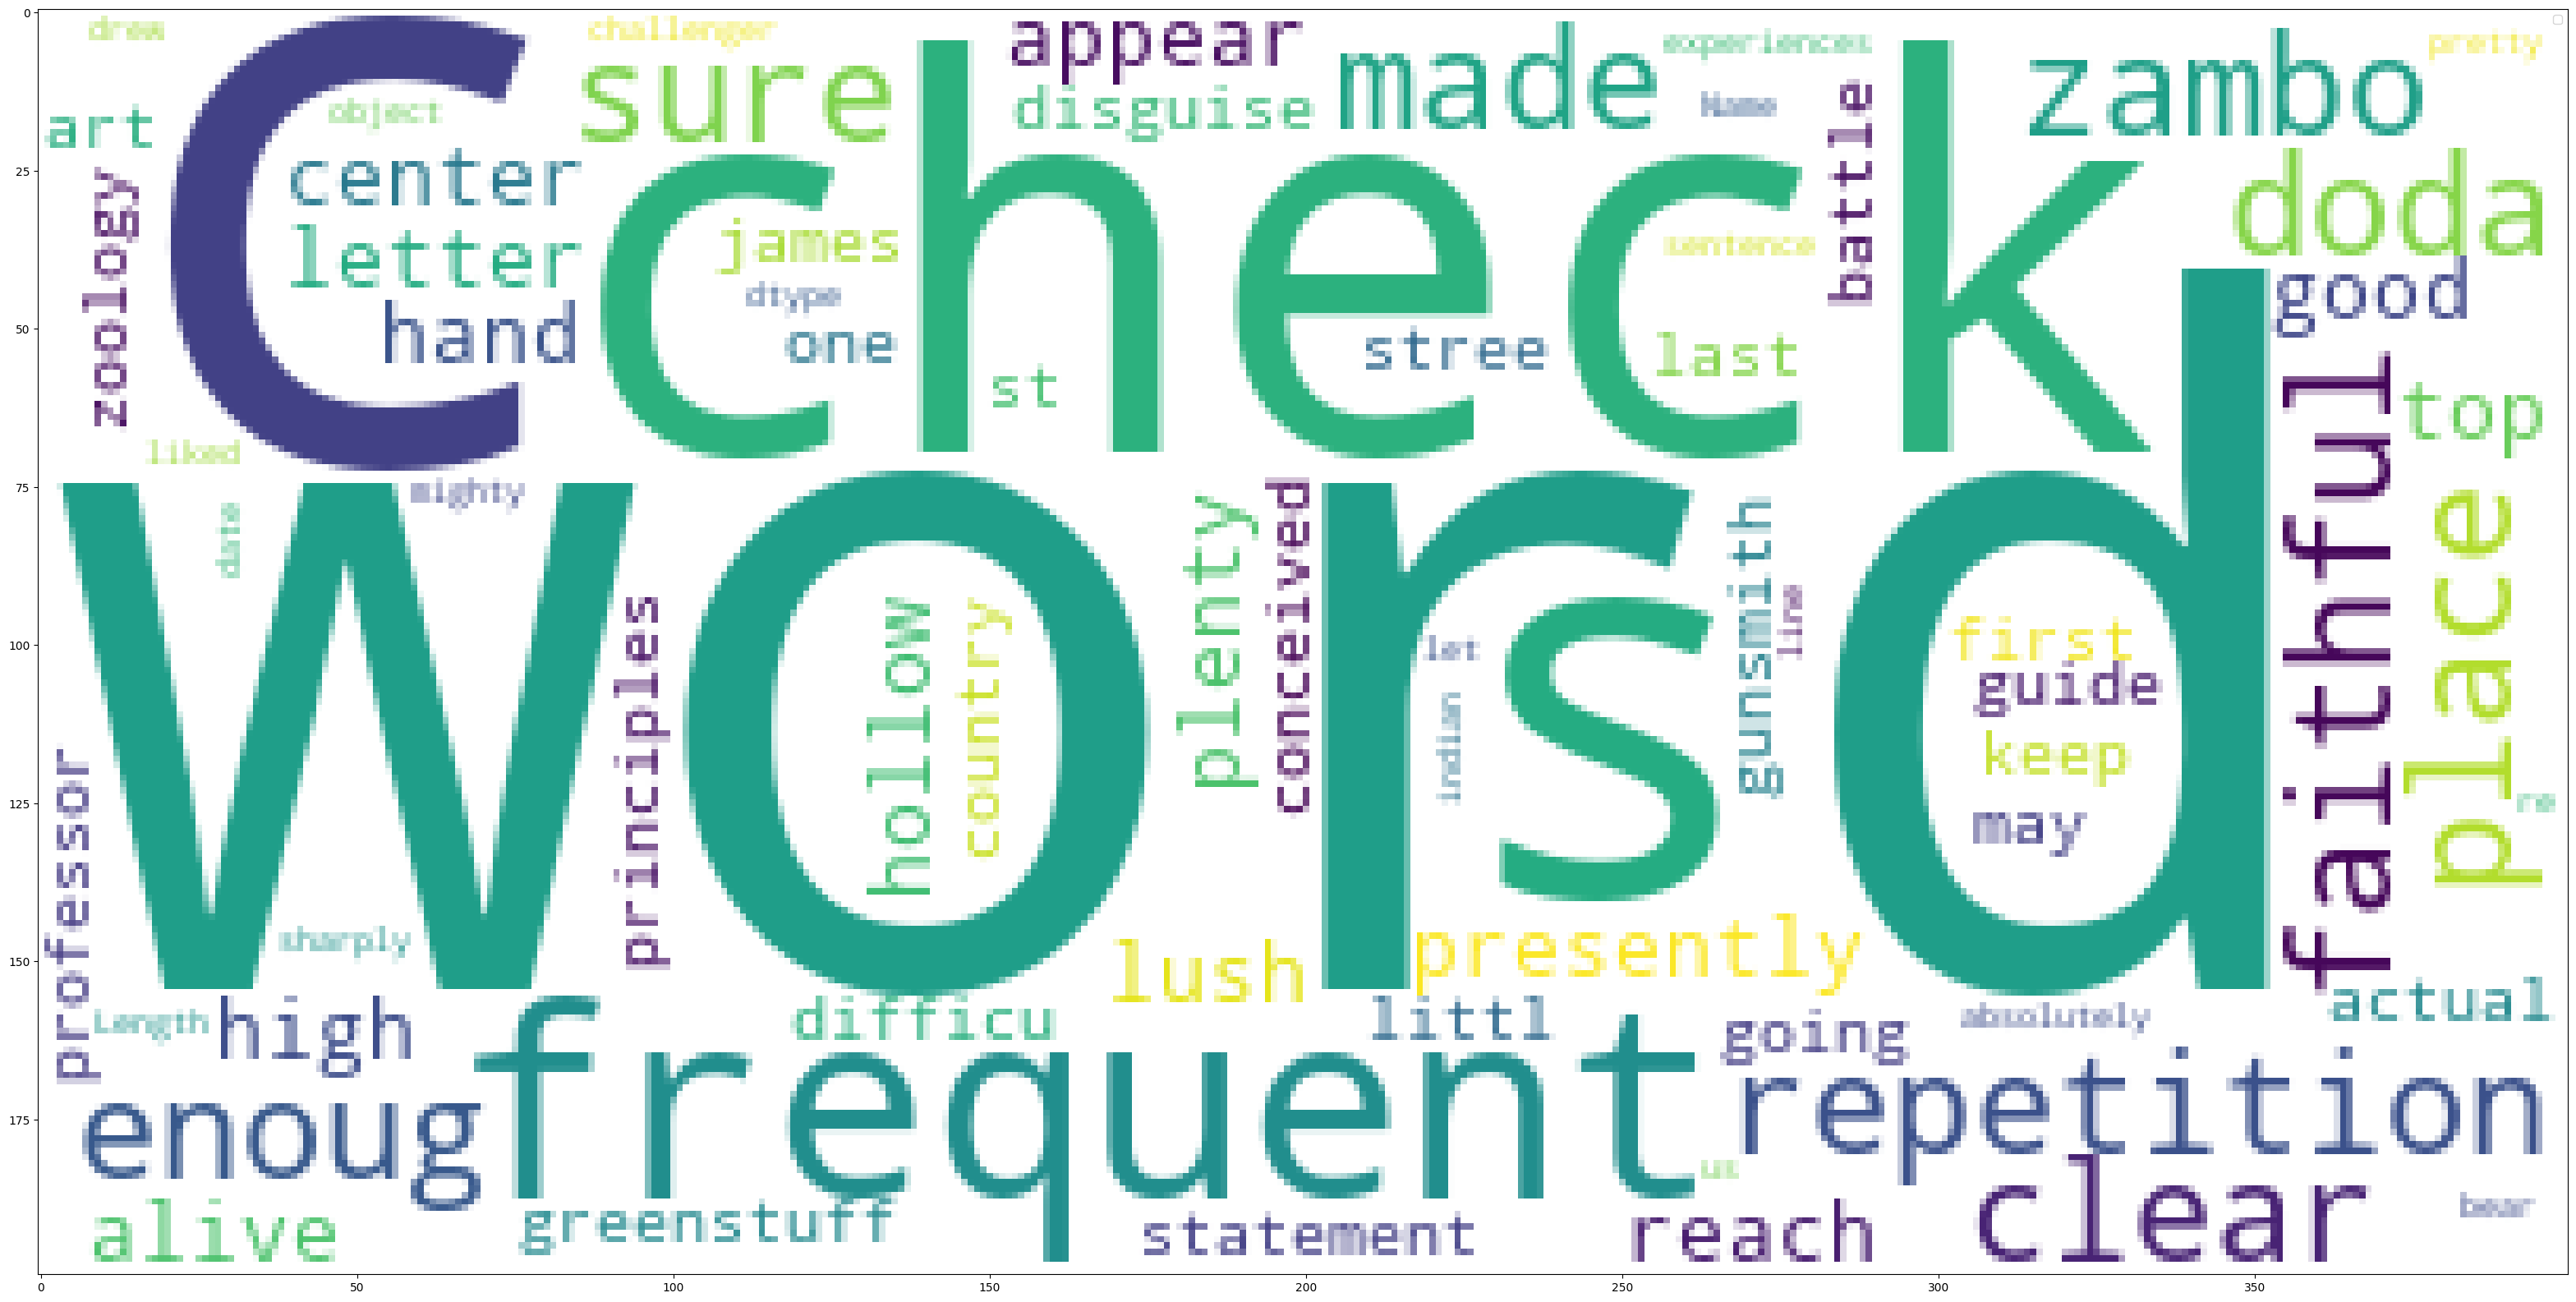

Name of Author  H. G. Wells
800    look hillside leaving thick streamers black sm...
801    insensible long time curate told came darkness...
802    plain vanilla ascii format used official versi...
803    killing beasts like said first speaker shell d...
804    scotch french dutch swedish steam launches tha...
                             ...                        
995    sunlight terrible june strange wonder unfamili...
996    intact engines working headed straight second ...
997    instead took fresh living blood creatures inje...
998    northward far street cobham parted thence woul...
999    hurrying round corner saw couple men strugglin...
Name: sentence, Length: 200, dtype: object


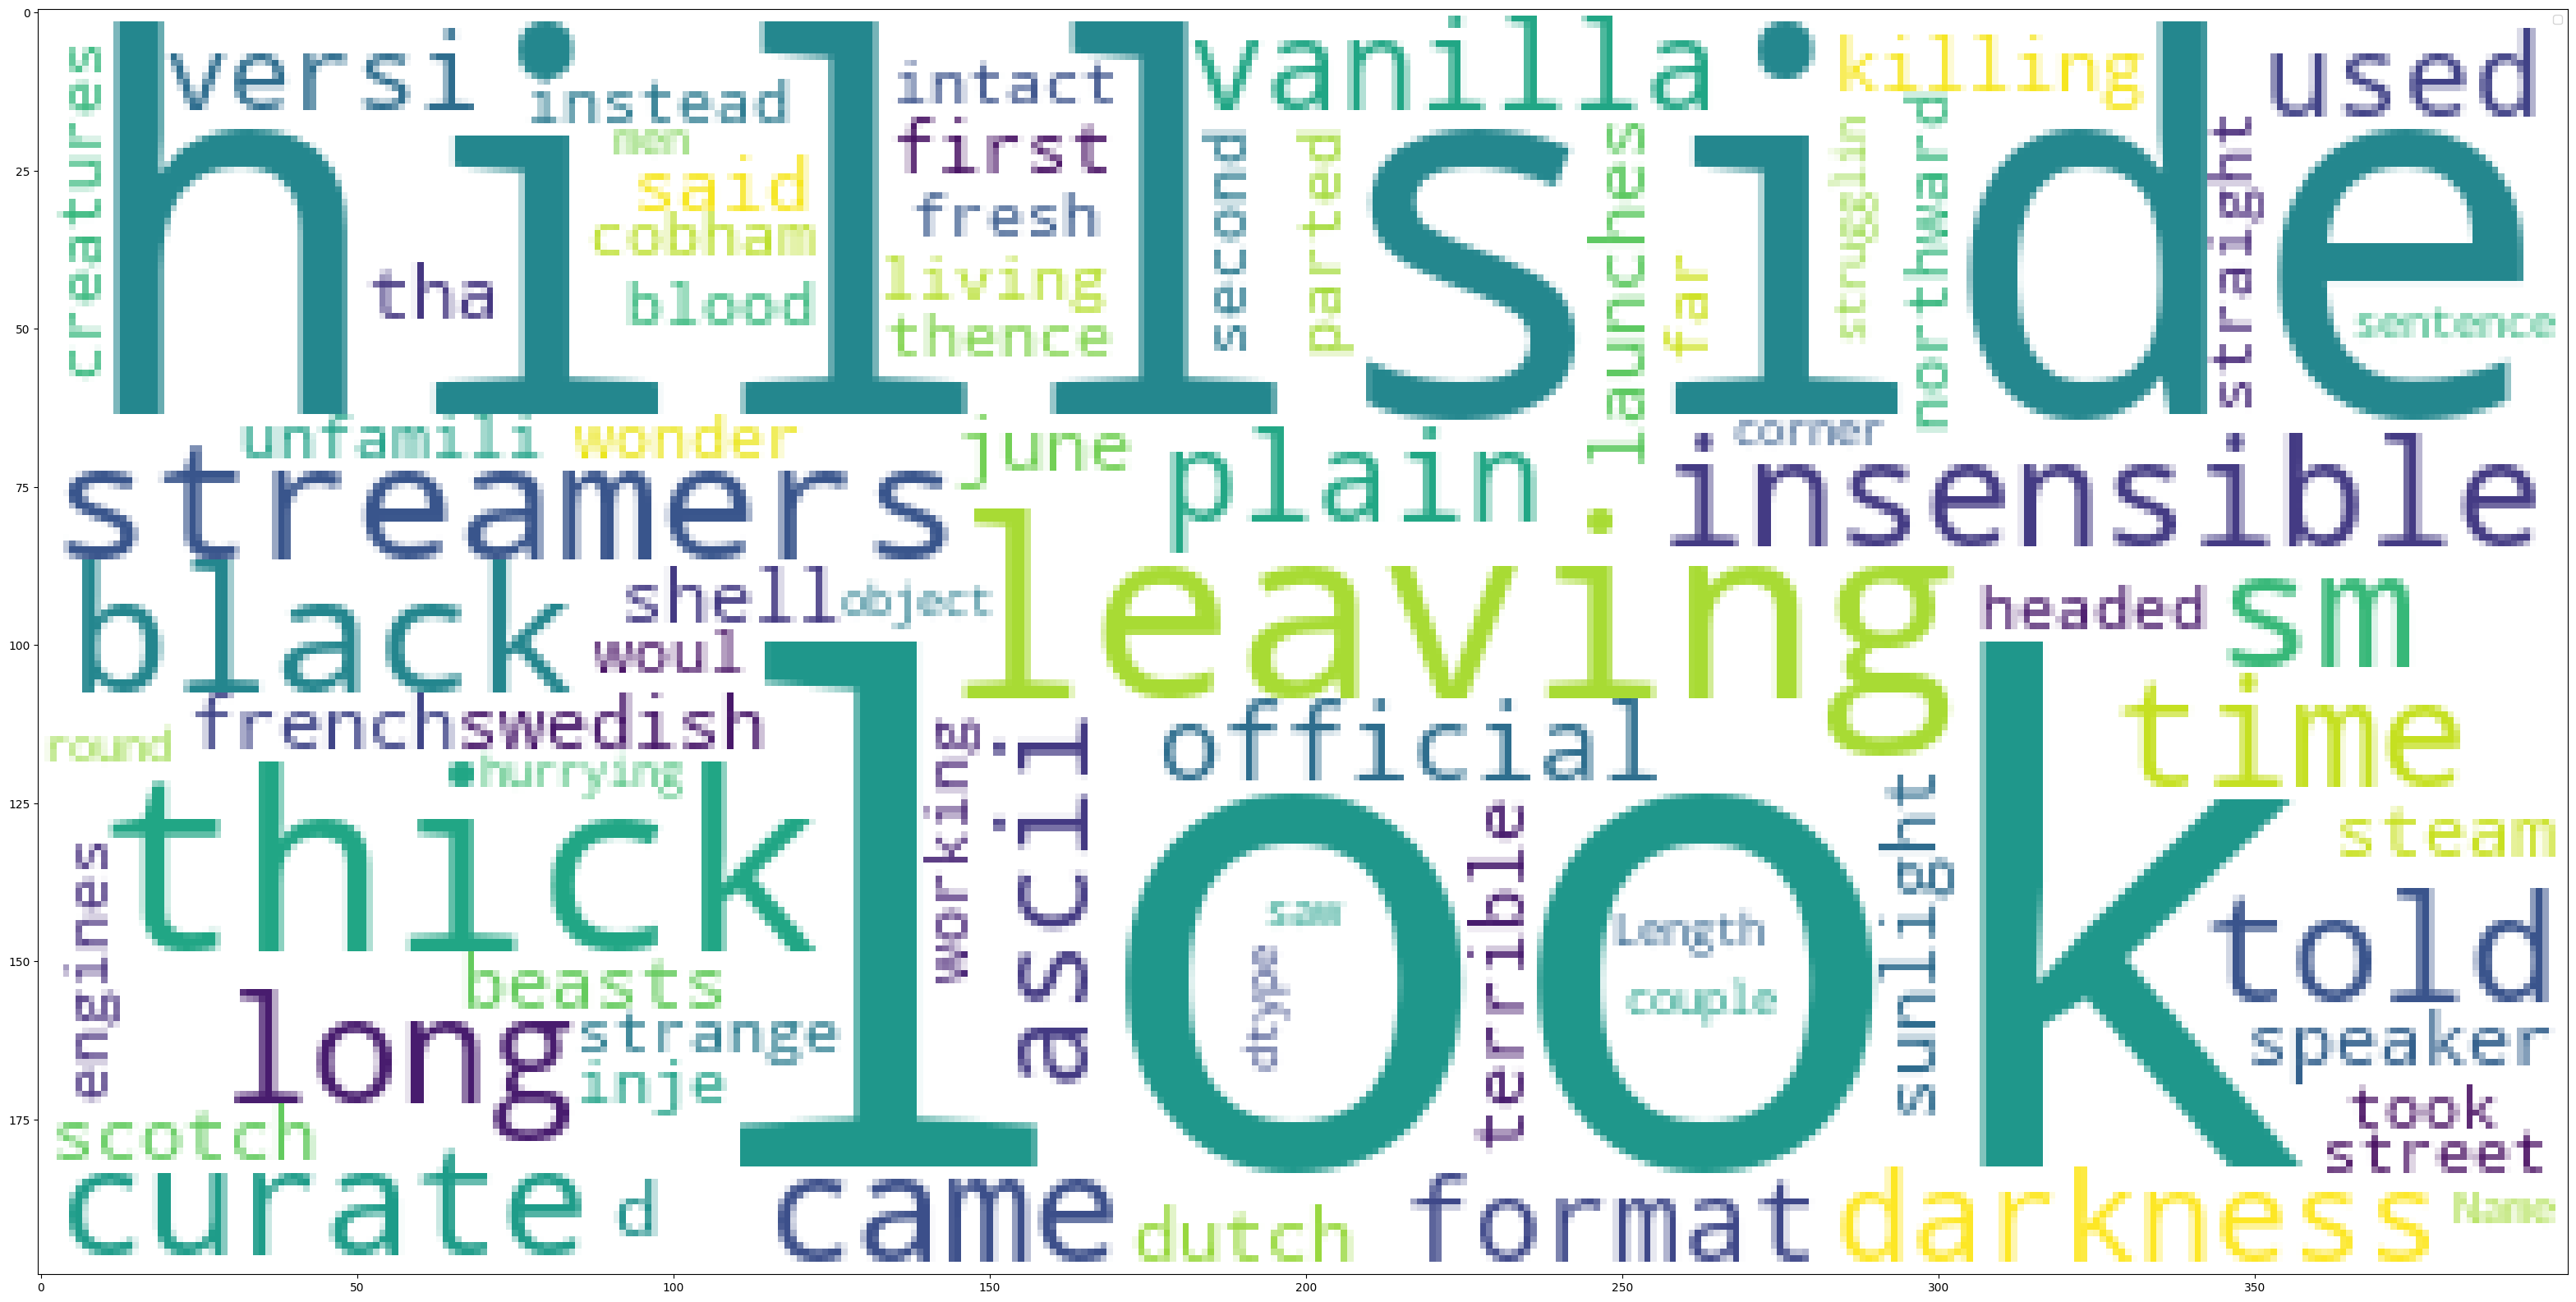

In [32]:
show_most_word_in_book(df_books,number_of_book=0,number_of_ma_word=300)
show_most_word_in_book(df_books,number_of_book=1,number_of_ma_word=300)
show_most_word_in_book(df_books,number_of_book=2,number_of_ma_word=300)
show_most_word_in_book(df_books,number_of_book=3,number_of_ma_word=300)
show_most_word_in_book(df_books,number_of_book=4,number_of_ma_word=300)

In [34]:
# split the data to intput  and Target
X = df_books['sentence']
Y = df_books['author']

In [35]:
# transform the data to a BOW

vect = CountVectorizer()
X_BOW = vect.fit_transform(X)
count_array = X_BOW.toarray()
df_books_BOW = pd.DataFrame(count_array,columns = vect.get_feature_names())
df_books_BOW

c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abandoned,abandoning,abated,abbreviated,abduct,abducted,abduction,abductors,abeyance,...,your,youth,youthful,zambo,zareba,zero,zigzags,zode,zoological,zoology
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value

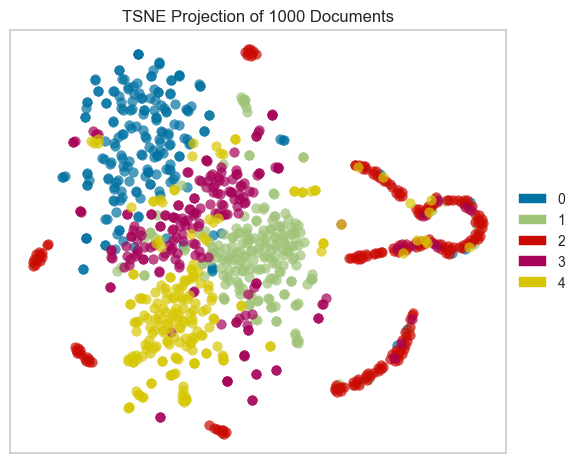

<AxesSubplot:title={'center':'TSNE Projection of 1000 Documents'}>

In [50]:

tsne = TSNEVisualizer()
tsne.fit(df_books_BOW,df_books['author'])
tsne.show()


########################################################################################################################  
##############tf-idf representation    
########################################################################################################################

In [37]:
# transform the data to a tf-idf representation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(df_books["sentence"])
#print(tfidf_vectorizer_vectors.toarray())
#print(tfidf_vectorizer.get_feature_names())
df_books_tf_idf = pd.DataFrame(tfidf_vectorizer_vectors.toarray(),columns=tfidf_vectorizer.get_feature_names())
df_books_tf_idf

c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abandoned,abandoning,abated,abbreviated,abduct,abducted,abduction,abductors,abeyance,...,your,youth,youthful,zambo,zareba,zero,zigzags,zode,zoological,zoology
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.218623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value

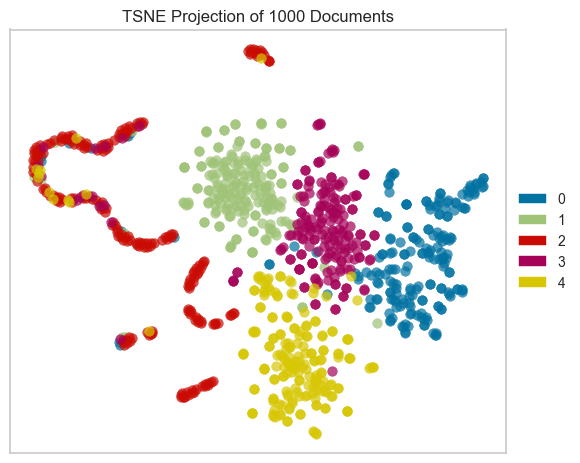

In [38]:
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(df_books_tf_idf,df_books['author'])

tsne.show(legend=["Author 1","Author 2","Author 3","Author 4","Author 5"])
plt.show()

In [13]:
# split the data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_BOW, Y, test_size=0.2, random_state=1)


In [14]:
# create a function to train and test the model with different performance metrics
from sklearn import metrics
def train_test_model(model, X_train, X_test, y_train, y_test):
    #print model name
    print(model.__class__.__name__)
    model.fit(X_train, y_train)
    y_pred_class = model.predict(X_test)
    print("-"*50)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    print("-"*50)
    print('Confusion Matrix: \n ', metrics.confusion_matrix(y_test, y_pred_class))
    print("-"*50)
    print('Classification Report:\n ', metrics.classification_report(y_test, y_pred_class))
    return model



In [15]:
# train and test the model with Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb = train_test_model(nb, X_train, X_test, y_train, y_test)

MultinomialNB
--------------------------------------------------
Accuracy:  0.945
--------------------------------------------------
Confusion Matrix:  [[39  0  0  0  1]
 [ 0 38  0  0  3]
 [ 0  0 31  2  3]
 [ 0  0  0 31  2]
 [ 0  0  0  0 50]]
--------------------------------------------------
Classification Report:
                precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       1.00      0.93      0.96        41
           2       1.00      0.86      0.93        36
           3       0.94      0.94      0.94        33
           4       0.85      1.00      0.92        50

    accuracy                           0.94       200
   macro avg       0.96      0.94      0.95       200
weighted avg       0.95      0.94      0.95       200



In [16]:
# train and test the model with XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb = train_test_model(xgb, X_train, X_test, y_train, y_test)

XGBClassifier
--------------------------------------------------
Accuracy:  0.92
--------------------------------------------------
Confusion Matrix:  [[37  2  0  0  1]
 [ 1 38  0  2  0]
 [ 1  0 30  3  2]
 [ 1  0  1 29  2]
 [ 0  0  0  0 50]]
--------------------------------------------------
Classification Report:
                precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.95      0.93      0.94        41
           2       0.97      0.83      0.90        36
           3       0.85      0.88      0.87        33
           4       0.91      1.00      0.95        50

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.92       200
weighted avg       0.92      0.92      0.92       200



In [17]:
# train and test the model with SVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm = train_test_model(svm, X_train, X_test, y_train, y_test)

SVC
--------------------------------------------------
Accuracy:  0.95
--------------------------------------------------
Confusion Matrix:  [[39  0  0  0  1]
 [ 0 38  0  0  3]
 [ 1  0 32  0  3]
 [ 0  0  0 31  2]
 [ 0  0  0  0 50]]
--------------------------------------------------
Classification Report:
                precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       1.00      0.93      0.96        41
           2       1.00      0.89      0.94        36
           3       1.00      0.94      0.97        33
           4       0.85      1.00      0.92        50

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



In [18]:
# train and test the model with Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = train_test_model(rf, X_train, X_test, y_train, y_test)


RandomForestClassifier
--------------------------------------------------
Accuracy:  0.935
--------------------------------------------------
Confusion Matrix:  [[39  0  0  0  1]
 [ 1 37  0  0  3]
 [ 1  0 32  0  3]
 [ 0  0  0 31  2]
 [ 0  0  0  2 48]]
--------------------------------------------------
Classification Report:
                precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       1.00      0.90      0.95        41
           2       1.00      0.89      0.94        36
           3       0.94      0.94      0.94        33
           4       0.84      0.96      0.90        50

    accuracy                           0.94       200
   macro avg       0.95      0.93      0.94       200
weighted avg       0.94      0.94      0.94       200



In [53]:
#N_gram
count_vect = CountVectorizer(ngram_range=(4,4))
ngram_vectors=count_vect.fit_transform(df_books["sentence"])
df2 = pd.DataFrame(ngram_vectors.toarray(),columns=count_vect.get_feature_names())
df2

c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon bottom abyss hand,abandon whole expedition rather,abandoned arguments paper probable,abandoned attempt communication patient,abandoned boat small remote,abandoned harness weapons lair,abandoned thought multitudinous hopes,abandoned tin trunk straw,abandoned weapons mystery still,abandoning former stealthy approach,...,zoological hall scene inception,zoological institute convened hear,zoological institute place position,zoological institute presents compliments,zoological institute since delegates,zoological institute three tramps,zoological institute wadley sent,zoology life justification returning,zoology little known possible,zoology unhappily crushed fine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value

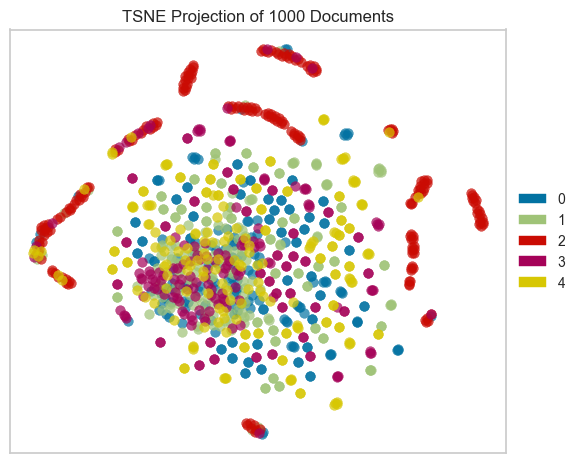

In [54]:
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(df2,df_books['author'])

tsne.show(legend=["Author 1","Author 2","Author 3","Author 4","Author 5"])
plt.show()

<AxesSubplot:title={'center':'Top 20 words'}, xlabel='word'>

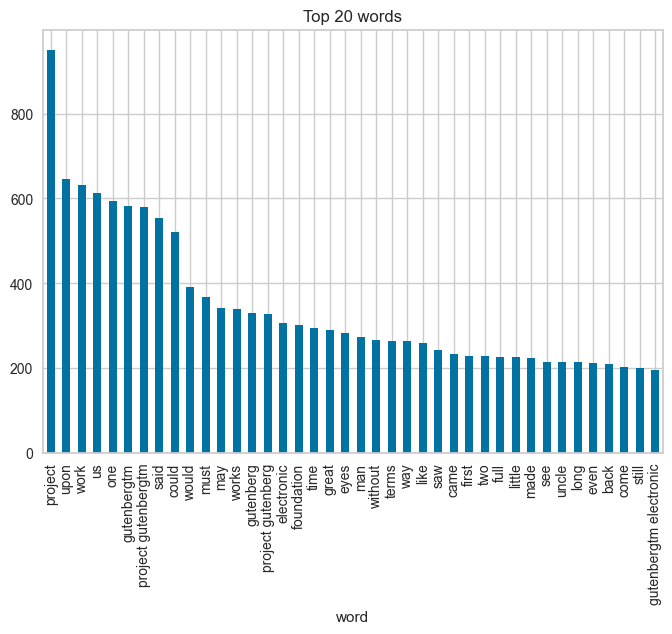

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_books['sentence'], 40)
#for word, freq in common_words:
    #print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df1.groupby('word').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 20 words')